In [7]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_data_df = pd.merge(clinical_trial_df, mouse_drug_df, on='Mouse ID', how='left')

# Display the data table for preview
drug_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = drug_data_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
avg_tumor_response = tumor_response.mean()

# Convert to DataFrame
avg_tumor_response_df = pd.DataFrame(avg_tumor_response)
avg_tumor_response_df = avg_tumor_response_df.reset_index()

# Preview DataFrame
avg_tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
avg_tumor_response_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_errors = tumor_response.sem()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_standard_errors)
tumor_sem_df = tumor_sem_df.reset_index()

# Preview DataFrame
tumor_sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_df = avg_tumor_response_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


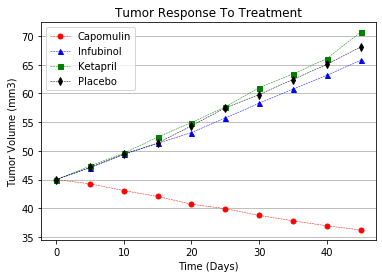

In [15]:
# Generate the Plot (with Error Bars)
plot_format = [('Capomulin','o','red'),('Infubinol','^','blue'),
               ('Ketapril','s','green'),('Placebo','d','black')]
fig, ax = plt.subplots()
line_handle_response = {}

for drug_name,marker,colors in plot_format:
    line_handle_response[drug_name] = plt.plot(ax=ax, label=drug_name)
    tumor_response_plot = plt.errorbar(pivot_tumor_df.index,
                                       pivot_tumor_df[drug_name],
#                                        legend,
                                       fmt=marker,ls='--',
                                       color=colors,linewidth=0.5,
                                       markersize=5)

plt.legend(line_handle_response, loc='best')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response To Treatment')
ax.yaxis.grid()

# Save the Figure

plt.savefig(os.path.join('tumor_response_to_treatment.png'))

plt.show()

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response = drug_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_metastatic_response = metastatic_response.mean()

# Convert to DataFrame
metastatic_avg_df = pd.DataFrame(avg_metastatic_response)
# metastatic_df = metastatic_df.reset_index()

# Preview DataFrame
metastatic_avg_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_standard_error = metastatic_response.sem()

# Convert to DataFrame
metastatic_sem_df = pd.DataFrame(metastatic_standard_error)

# Preview DataFrame
metastatic_sem_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [18]:
# Minor Data Munging to Re-Format the Data Frames
formatted_metastatic_avg_df = metastatic_avg_df.reset_index()
pivot_metastatic_df = formatted_metastatic_avg_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
pivot_metastatic_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [19]:
pivot_metastatic_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


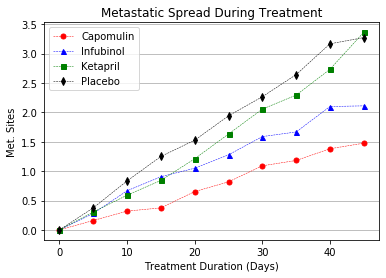

In [23]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
start, end = ax.get_xlim()
line_handle_metastatic= {}

for drug_name,marker,colors in plot_format:
    line_handle_metastatic[drug_name] = plt.plot(ax=ax, label=drug_name)
    metastatic_plot = plt.errorbar(pivot_metastatic_df.index,
                                   pivot_metastatic_df[drug_name],
#                                    legend,
                                   fmt=marker,ls='--',
                                   color=colors,linewidth=0.5,
                                   markersize=5)

plt.legend(line_handle_metastatic, loc='best')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
ax.yaxis.grid()

# Save the Figure
plt.savefig(os.path.join('tumor_response_to_treatment.png'))

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_grouped = drug_data_df.groupby(['Drug','Timepoint'])['Mouse ID']
mice_count = mice_count_grouped.count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df = mice_count_df.reset_index()

# Preview DataFrame
mice_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [26]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice_count_df = mice_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')

# Preview the Data Frame
pivot_mice_count_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


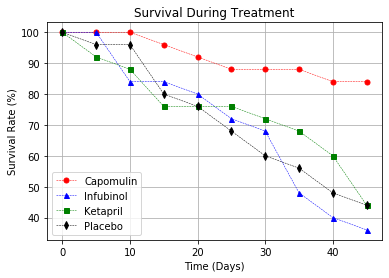

In [32]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
start, end = ax.get_xlim()
line_handle_count= {}

for drug_name,marker,colors in plot_format:
    mouse_count = pivot_mice_count_df[drug_name][0]
    survival_percentage = (pivot_mice_count_df[drug_name]/mouse_count)*100
    line_handle_count[drug_name] = plt.plot(ax=ax, label=drug_name)
    mice_count_plot = plt.errorbar(pivot_mice_count_df.index,
                                   survival_percentage,
#                                    legend,
                                   marker=marker,ls='--',
                                   color=colors,linewidth=0.5,
                                   markersize=5)

plt.legend(line_handle_count, loc='best')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.grid()
    

# Save the Figure
plt.savefig(os.path.join('survival_during_treatment.png'))

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [33]:
# Calculate the percent changes for each drug
percent_changes = (pivot_tumor_df.iloc[-1]/(pivot_tumor_df.iloc[0])-1)*100

# Display the data to confirm
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

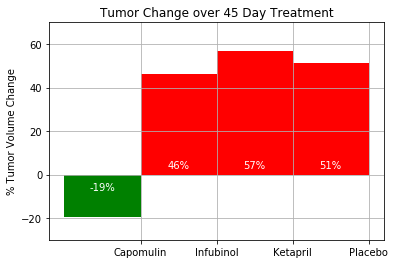

In [39]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = percent_changes < 0

# Splice the data between passing and failing drugs
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
percent_change_list = [(percent_changes[drug]) for drug in drugs]
percent_change_plot = plt.bar(drugs,percent_change_list,width=-1,align='edge',
                             color=percent_tuple.map({True:'g',False:'r'}))

# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def plot_label(changes):
    for change in changes:
        height = change.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(change.get_x() + change.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',ha='center', va='bottom')

# Call functions to implement the function calls
plot_label(percent_change_plot)

# Save the Figure
plt.savefig(os.path.join('tumor_change_over_treatment.png'))

# Show the Figure
# fig.show()
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)